In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [10]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [1]:
import datetime

# Data manipulation libraries
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
from IPython.display import Image

# Tensorflow libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable memory growth for GPU acceleration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Preprocess Image
### Load and scale the images from directory using the ImageDataGenerator

In [4]:

# Define the paths to your data
train_dir = "/content/drive/MyDrive/DL_Project/Dataset/Train"#r"D:\Winter23\COMP263_DeepLearning_SEC002\Project\Dataset\Train"
val_dir = "/content/drive/MyDrive/DL_Project/Dataset/Validation"
test_dir = "/content/drive/MyDrive/DL_Project/Dataset/Test"

# Define the image size and batch size
img_size = 224
batch_size = 32

# Define the data augmentation options
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Create the train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

# Load the test dataset without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')


Found 1500 images belonging to 3 classes.
Found 459 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## Visualization

Train tensor shape: (32, 224, 224, 3)
Validation tensor shape: (32, 224, 224, 3)
Test tensor shape: (32, 224, 224, 3)


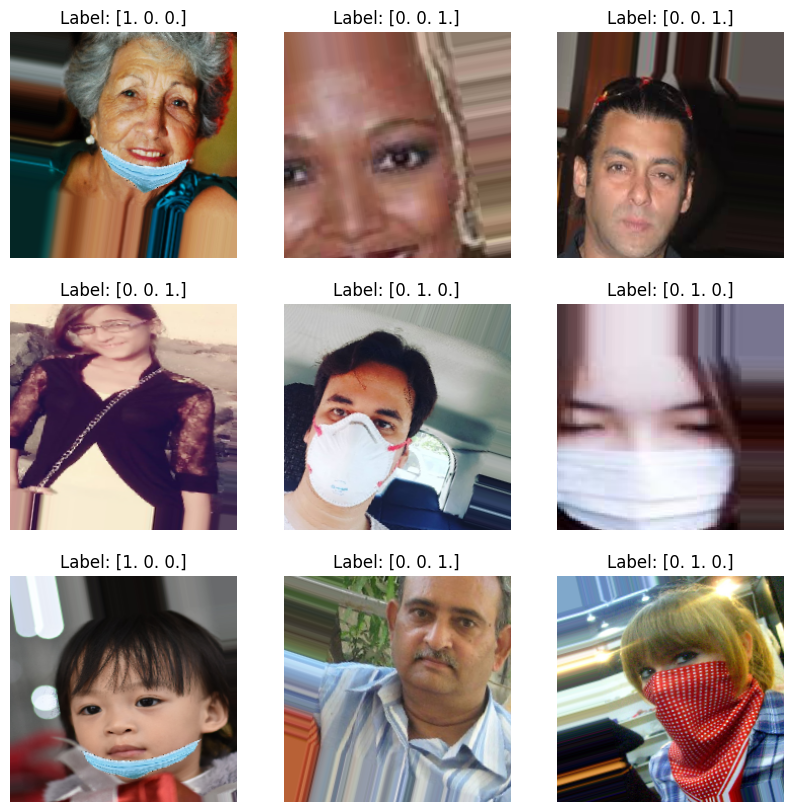

In [ ]:
# Print the overall tensor shapes
print("Train tensor shape:", train_generator[0][0].shape)
print("Validation tensor shape:", val_generator[0][0].shape)
print("Test tensor shape:", test_generator[0][0].shape)

# Plot some sample images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.ravel()

for i in range(9):
    img = train_generator[0][0][i]
    label = train_generator[0][1][i]
    axs[i].imshow(img)
    axs[i].set_title("Label: " + str(label))
    axs[i].axis('off')

plt.show()

## Check if the dataset is imbalanced

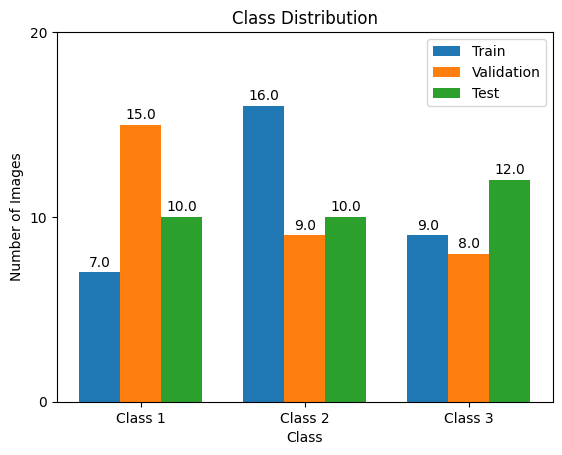

In [ ]:

# Get the number of images in each class
train_class_count = np.sum(train_generator[0][1], axis=0)
val_class_count = np.sum(val_generator[0][1], axis=0)
test_class_count = np.sum(test_generator[0][1], axis=0)

# Create a bar chart to display the class counts
fig, ax = plt.subplots()
x = np.arange(len(train_class_count))
width = 0.25

rects1 = ax.bar(x - width, train_class_count, width, label='Train')
rects2 = ax.bar(x, val_class_count, width, label='Validation')
rects3 = ax.bar(x + width, test_class_count, width, label='Test')

ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Class Distribution')
ax.set_xticks(x)
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.legend()

# Set the yticks to display the counts
yticks = np.arange(0, max(train_class_count)+10, 10)
ax.set_yticks(yticks)

for rect1, rect2, rect3 in zip(rects1, rects2, rects3):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()
    ax.annotate(f'{height1}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                xytext=(0, 2), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{height2}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(0, 2), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{height3}', xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                xytext=(0, 2), textcoords="offset points", ha='center', va='bottom')

plt.show()

## Model Building

In [5]:

# Load the pre-trained model, exclude the top layer and freeze the rest
base_model = EfficientNetB3(include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add a new top layer
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# Output layer
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.483824 to fit



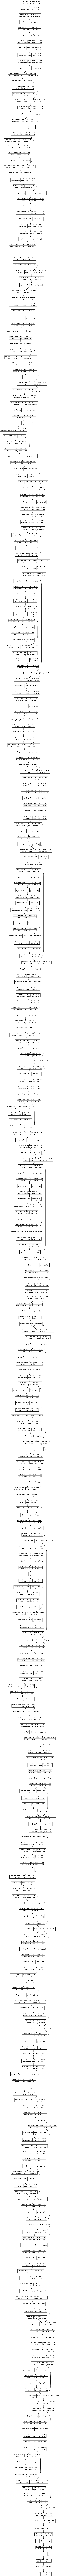

In [7]:
# Set the DPI and plot size
dpi = 150

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='efficientnet.png', dpi=dpi)

# Display the plot inline
Image(filename='efficientnet.png')


In [6]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

46 14


In [7]:
from tensorflow.keras.callbacks import TensorBoard

# Set up checkpoints and early stopping
#'/content/drive/MyDrive/DL_Project/Models'

checkpoint_path = r'/content/drive/MyDrive/DL_Project/Models/{epoch:02d}-{val_loss:.2f}.h5'

checkpoint = ModelCheckpoint(checkpoint_path,
                                  monitor='val_accuracy',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights = True, patience=5, verbose=1, mode='min')


callbacks = [TensorBoard(log_dir= '/content/drive/MyDrive/DL_Project/Logs',histogram_freq=1),
             checkpoint]

# Train the model
start_time = datetime.datetime.now()
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=30, 
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks= callbacks) #[checkpoint, early_stop])

end_time = datetime.datetime.now()

# Print the time taken to train the model
print(f'Time taken to train the model: {end_time - start_time}')

Epoch 1/30
46/46 [==============================] - ETA: 0s - loss: 1.2974 - accuracy: 0.3563
Epoch 1: val_accuracy improved from -inf to 0.33929, saving model to /content/drive/MyDrive/DL_Project/Models/01-1.11.h5
46/46 [==============================] - 767s 16s/step - loss: 1.2974 - accuracy: 0.3563 - val_loss: 1.1117 - val_accuracy: 0.3393
Epoch 2/30
46/46 [==============================] - ETA: 0s - loss: 1.3430 - accuracy: 0.3195
Epoch 2: val_accuracy did not improve from 0.33929
46/46 [==============================] - 56s 1s/step - loss: 1.3430 - accuracy: 0.3195 - val_loss: 1.0971 - val_accuracy: 0.3170
Epoch 3/30
46/46 [==============================] - ETA: 0s - loss: 1.3160 - accuracy: 0.3243
Epoch 3: val_accuracy did not improve from 0.33929
46/46 [==============================] - 55s 1s/step - loss: 1.3160 - accuracy: 0.3243 - val_loss: 1.2431 - val_accuracy: 0.3348
Epoch 4/30
46/46 [==============================] - ETA: 0s - loss: 1.2735 - accuracy: 0.3624
Epoch 4: val

In [10]:
# Save the model
model.save_weights(r'/content/drive/MyDrive/DL_Project/Models/final_model_EfficientNB3.h5')

from keras.models import load_model

model.load_weights(r'/content/drive/MyDrive/DL_Project/Models/10-1.10.h5')

5/5 [==============================] - 80s 20s/step - loss: 1.0975 - accuracy: 0.4667
Test loss: 1.0974901914596558, Test accuracy: 0.46666666865348816


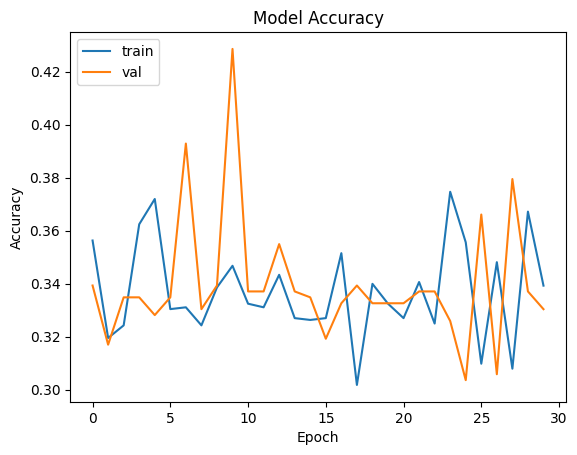

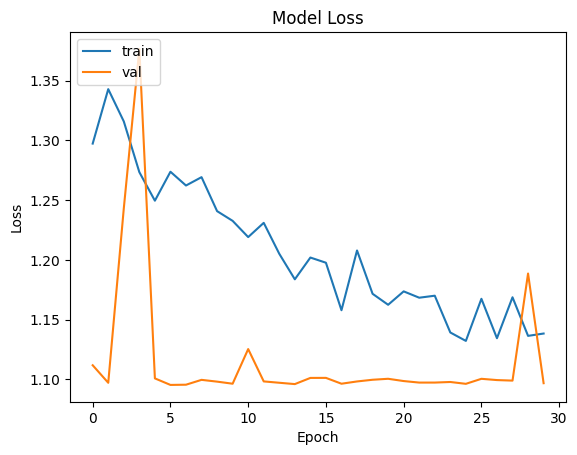

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Plot the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
from sklearn.metrics import classification_report


predictions = model.predict(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

5/5 [==============================] - 6s 672ms/step
               precision    recall  f1-score   support

IncorrectMask       0.00      0.00      0.00        50
         Mask       0.25      0.20      0.22        50
      NonMask       0.31      0.68      0.42        50

     accuracy                           0.29       150
    macro avg       0.19      0.29      0.22       150
 weighted avg       0.19      0.29      0.22       150



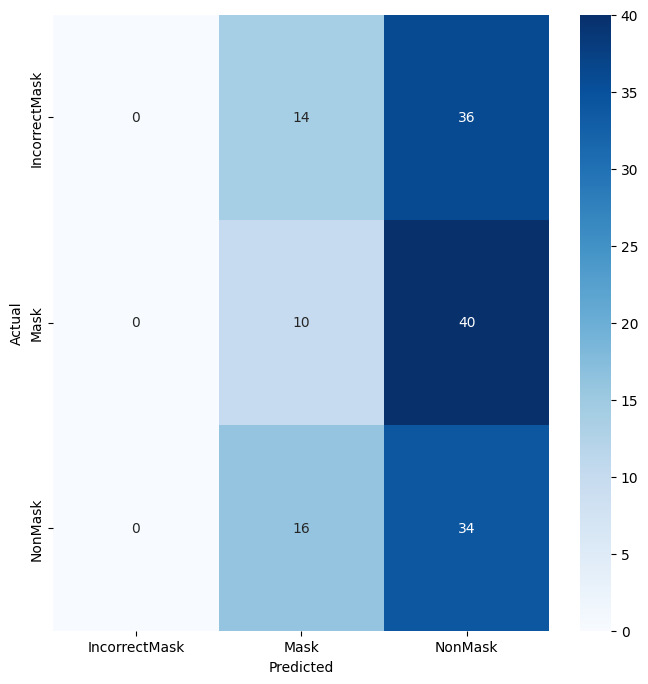

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert class labels to numeric form
label_map = (train_generator.class_indices)
test_labels = test_generator.classes
pred_labels = np.argmax(predictions, axis=-1)

# Plot confusion matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_map, yticklabels=label_map)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Import the necessary libraries
from tensorflow.keras.applications.xception import Xception

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a Flatten layer
x = tf.keras.layers.Flatten()(base_model.output)

# Add a Dropout layer to prevent overfitting
x = tf.keras.layers.Dropout(0.5)(x)

# Add a Dense layer with 3 output units and softmax activation
predictions = Dense(3, activation='softmax')(x)

# Create a new model with the above layers
model_Xception = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_Xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_Xception.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [17]:
checkpoint_path = r'/content/drive/MyDrive/DL_Project/Models/xception-{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(checkpoint_path,
                                  monitor='val_accuracy',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights = True, patience=5, verbose=1, mode='min')


callbacks = [TensorBoard(log_dir= '/content/drive/MyDrive/DL_Project/Logs',histogram_freq=1),
             checkpoint]

# Train the model
start_time = datetime.datetime.now()
history = model_Xception.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=1, 
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks= callbacks) #[checkpoint, early_stop])

end_time = datetime.datetime.now()

# Print the time taken to train the model
print(f'Time taken to train the model: {end_time - start_time}')

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.9210
Epoch 1: val_accuracy improved from -inf to 0.91518, saving model to /content/drive/MyDrive/DL_Project/Models/xception-01-0.79.hdf5
46/46 [==============================] - 52s 1s/step - loss: 0.6839 - accuracy: 0.9210 - val_loss: 0.7930 - val_accuracy: 0.9152
Epoch 2/10
46/46 [==============================] - ETA: 0s - loss: 0.2958 - accuracy: 0.9578
Epoch 2: val_accuracy improved from 0.91518 to 0.93973, saving model to /content/drive/MyDrive/DL_Project/Models/xception-02-0.52.hdf5
46/46 [==============================] - 52s 1s/step - loss: 0.2958 - accuracy: 0.9578 - val_loss: 0.5160 - val_accuracy: 0.9397
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.9605
Epoch 3: val_accuracy did not improve from 0.93973
46/46 [==============================] - 49s 1s/step - loss: 0.3887 - accuracy: 0.9605 - val_loss: 1.8577 - val_accuracy: 0.8415
Epoch 4/10
46

In [19]:
# Save the model
model_Xception.save_weights(r'/content/drive/MyDrive/DL_Project/Models/final_model_Xception.h5')


model_Xception.load_weights(r'/content/drive/MyDrive/DL_Project/Models/xception-07-0.53.hdf5')

5/5 [==============================] - 3s 706ms/step - loss: 0.2963 - accuracy: 0.9333
Test loss: 0.2962660491466522, Test accuracy: 0.9333333373069763


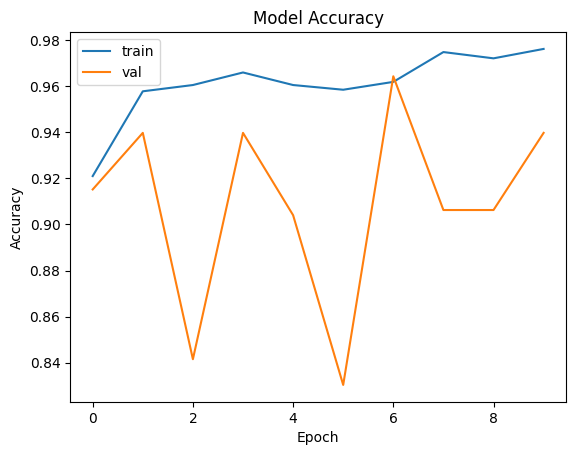

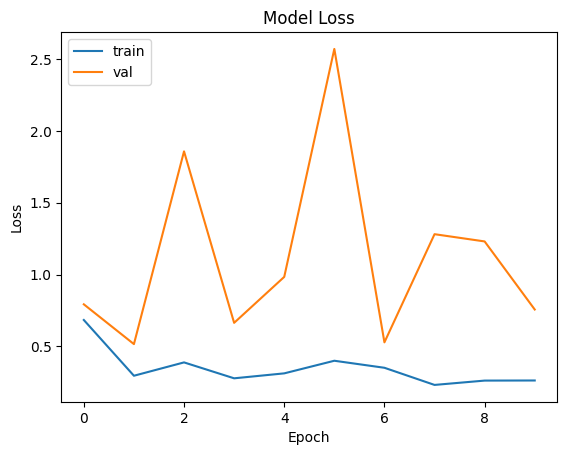

In [20]:
# Evaluate the model
test_loss, test_accuracy = model_Xception.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Plot the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:

predictions = model_Xception.predict(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

5/5 [==============================] - 3s 490ms/step
               precision    recall  f1-score   support

IncorrectMask       0.27      0.28      0.27        50
         Mask       0.31      0.32      0.32        50
      NonMask       0.34      0.32      0.33        50

     accuracy                           0.31       150
    macro avg       0.31      0.31      0.31       150
 weighted avg       0.31      0.31      0.31       150



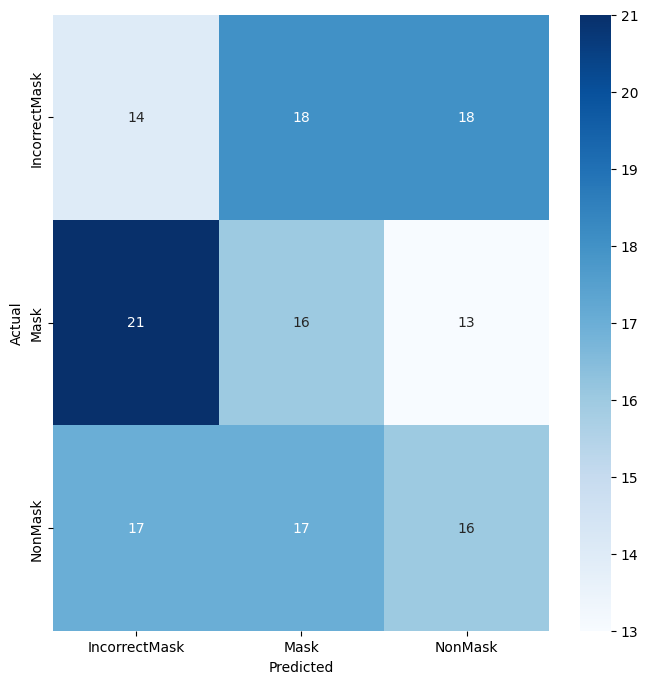

In [22]:

# Convert class labels to numeric form
label_map = (train_generator.class_indices)
test_labels = test_generator.classes
pred_labels = np.argmax(predictions, axis=-1)

# Plot confusion matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_map, yticklabels=label_map)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()